선형회귀 (Linear Regression)    
https://wikidocs.net/53560

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

In [3]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

자동 미분 (Autograd)   
https://wikidocs.net/60754

In [4]:
w = torch.tensor(2.0, requires_grad=True)

In [5]:
y = w**2
z = 2*y + 5

In [6]:
z.backward()  # backward() : 편미분 함수

In [7]:
print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0


선형회귀 클래스로 구현하기  
https://wikidocs.net/60036

In [8]:
torch.manual_seed(1)

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [10]:
model = LinearRegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [11]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [12]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


미니 배치  
https://wikidocs.net/55580

In [13]:
from torch.utils.data import TensorDataset 
from torch.utils.data import DataLoader 

In [14]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [15]:
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [16]:
'''
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()
'''
model = nn.Linear(3,1)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [17]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    print(batch_idx)
    print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

0
[tensor([[73., 80., 75.],
        [93., 88., 93.]]), tensor([[152.],
        [185.]])]
Epoch    0/20 Batch 1/3 Cost: 40594.312500
1
[tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]]), tensor([[142.],
        [196.]])]
Epoch    0/20 Batch 2/3 Cost: 13990.650391
2
[tensor([[89., 91., 90.]]), tensor([[180.]])]
Epoch    0/20 Batch 3/3 Cost: 4647.538574
0
[tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  90.]]), tensor([[196.],
        [180.]])]
Epoch    1/20 Batch 1/3 Cost: 1391.858887
1
[tensor([[73., 66., 70.],
        [93., 88., 93.]]), tensor([[142.],
        [185.]])]
Epoch    1/20 Batch 2/3 Cost: 363.744080
2
[tensor([[73., 80., 75.]]), tensor([[152.]])]
Epoch    1/20 Batch 3/3 Cost: 23.394409
0
[tensor([[93., 88., 93.],
        [73., 66., 70.]]), tensor([[185.],
        [142.]])]
Epoch    2/20 Batch 1/3 Cost: 94.733612
1
[tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  90.]]), tensor([[196.],
        [180.]])]
Epoch    2/20 Batch 2/3 Cost: 5.279524
2
[tensor([[73., 80., 

In [18]:
new_var =  torch.FloatTensor([[73, 80, 75]]) 
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[155.0277]], grad_fn=<AddmmBackward>)


소프트맥스 회귀로 MNIST 분류  
https://wikidocs.net/60324

In [19]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [20]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cpu


In [21]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [22]:
training_epochs = 15
batch_size = 100

In [23]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [24]:
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=batch_size, # 배치 크기 100
                                          shuffle=True,
                                          drop_last=True)

In [25]:
linear = nn.Linear(784, 10, bias=True).to(device)
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [26]:
for epoch in range(training_epochs): # training_epochs= 15
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577745
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404700
Epoch: 0005 cost = 0.307107002
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074089
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874764
Epoch: 0015 cost = 0.274422735
Learning finished


Accuracy: 0.8883000016212463
Label:  8
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


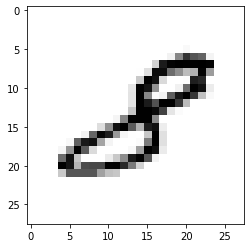

In [27]:
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()